<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://fra.utn.edu.ar/">
<image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/assets_python/logoUTN-500.svg"  width="100">
</a></td>
<td style="border:none;"><font face="times" size=4>Física 2<br>2024<br>Electromagnetismo<br>Material para trabajo en clase</font>
</td>
</tr>
</table> 

</br>

<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es"><image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/docs/assets/img/by-nc-sa.svg" width="70" /></a></td>
<td style="border:none;"><font face="times" size=4>2024 Edgardo Palazzo (epalazzo@fra.utn.edu.ar)</font>
</td>
</tr>
</table>

# Ejercicio 9.11

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, cos, sin, pi
import sys

np.seterr(divide='ignore')  # Elimina advertencia al dividir por cero.
%precision %.3f

!pip install --index-url https://test.pypi.org/simple/ --no-deps --upgrade frautnEM
from frautnEM.puntuales import plotEfcontribuciones, plotEfVector, equipotencialesPuntuales
from frautnEM.puntuales import plotEf, plotEfVectorHilo, plotEfvector3d

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip --quiet install ipympl
  from google.colab import output
  output.enable_custom_widget_manager()

# Figuras interactivas.
# Comentar si se quiere mantener las figuras luego de cerrar el cuaderno.
%matplotlib widget

Looking in indexes: https://test.pypi.org/simple/
  Attempting uninstall: frautnEM
    Found existing installation: frautnEM 0.0.1
    Uninstalling frautnEM-0.0.1:
      Successfully uninstalled frautnEM-0.0.1


In [14]:
def E(x, y, z, Q):
    """Calcula las componentes del campo eléctrico en N/C.
    Ingresar valores de x,y,z en metros y q en coulomb.
    Q es una lista de la forma:
    Q = [
        [q1,x1,y1,z1],
        [q2,x2,y2,z2],
        ...
        [qN,xN,yN,zN]
    ]
    """
    k = 9E9   #Constante de Coulomb en las unidades correspondientes.

    Ei,Ej,Ek = 0,0,0
    for qi in Q:
        r = ((x - qi[1])**2 + (y - qi[2])**2 + (z - qi[3])**2)**(3/2)
        Ei = Ei + k * qi[0] * (x - qi[1]) / r
        Ej = Ej + k * qi[0] * (y - qi[2]) / r
        Ek = Ek + k * qi[0] * (z - qi[3]) / r

    return Ei, Ej, Ek

# Densidad lineal
cargalambda = -12E-9
# Radio
R = 25E-2
# Carga total del objeto:
Qtotal = cargalambda*0.5*pi*R

# Número de cargas en que se divide el cuerpo extenso:
N = 500

# Valor de cada carga "infinitesimal"
dq = Qtotal/N
# Separación angular entre cargas:
dt = 0.5*pi/N
# Angulo de la primer carga (el centro del primer "diferencial" de longitud dx=R*dt):
t0 = dt/2

# Lista de cargas
Q = []
for i in np.arange(N):
    Q = Q + [[dq, R*cos(t0+i*dt), R*sin(t0+i*dt),0]]

# Campo eléctrico en la posición deseada.
E(0,0,0,Q)


(432.000, 432.000, 0.000)

Algunos vectores de ejemplo:

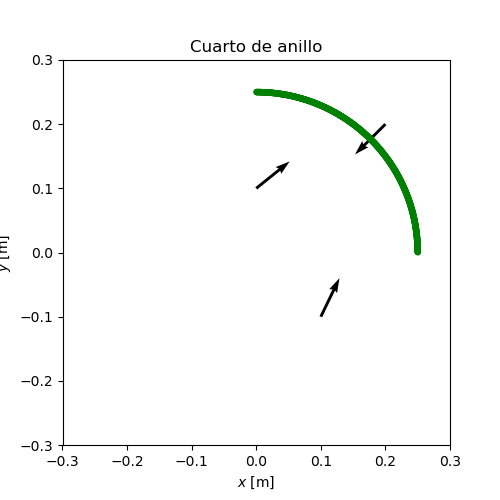

In [16]:
# X = [[0,0.1,0],[0,-0.1,0],[-0.2,0,0],[0.2,0,0],[-0.1,0.1,0],[0.1,0.1,0],[-0.1,-0.1,0],[0.1,-0.1,0]]
X = [[0,0.1,0], [0.2,0.2,0], [0.1, -0.1,0]]
plotEfVector(E, Q, X, limites=[-0.3,0.3,-0.3,0.3], title="Cuarto de anillo", scale=10)

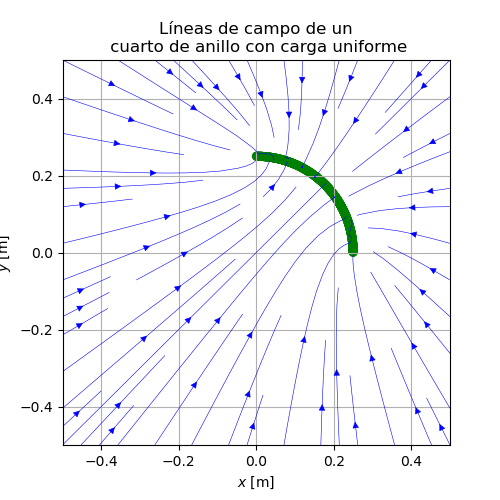

In [20]:
plotEf(Q, dx=0.5, density=0.75, title='Líneas de campo de un\n cuarto de anillo con carga uniforme')

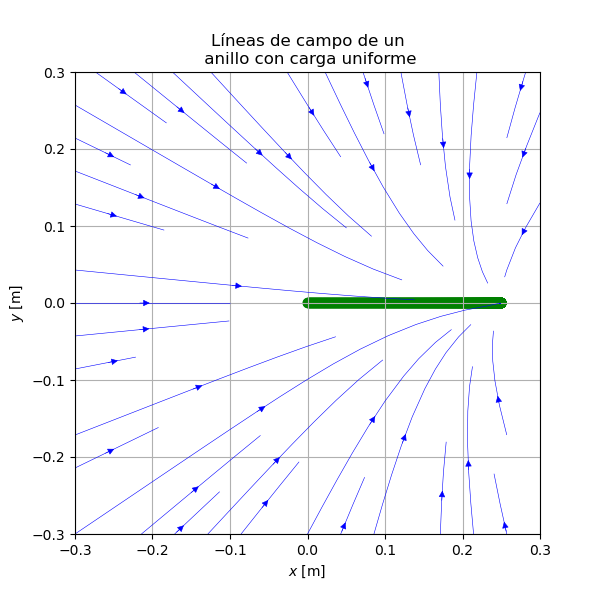

In [21]:
# Para ver las líneas sobre el plano $ik$ usando la misma función, hacemos trampa y
# escribimos el anillo en el plano $ik$ y graficamos la líneas
# en el plano $ij$.

Qr = []
for i in np.arange(N):
    Qr = Qr + [[dq, R*np.cos(t0+i*dt), 0, R*np.sin(t0+i*dt)]]

plotEf(Qr, dx=0.3, density=0.5, title='Líneas de campo de un\n anillo con carga uniforme',
          figsize=(6,6))


In [ ]:
# Si se abrieron muchas figuras, con el siguiente comando se puede liberar memoria.

# plt.close('all')    